#  Install package

In [1]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai
# ! pip install contextily
# ! pip install matplotlib_scalebar
# ! pip install langchain
# ! pip install langchain-openai
# ! pip install langchain-core
# ! pip install geojson
# ! pip install OSMPythonTools
# ! pip install osmnx
# ! pip install langchain openai --upgrade

# Import package

In [2]:
%load_ext autoreload
%autoreload 2
    
import os
import rasterio
from PIL import Image

import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
# from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output
import matplotlib.pyplot as plt

import base64

import pickle
import sys
import osmnx as ox

import LLM_Find_Constants as constants
import helper

import numpy as np
# from LLM_Find_kernel import Solution

from langchain_openai import ChatOpenAI

# from langchain_core.prompts import ChatPromptTemplate

OpenAI_key = helper.load_OpenAI_key()

E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\LLM_Find_Codebase.py:235: SyntaxWarning: invalid escape sequence '\C'
  OpenStreetMap_code_sample_2 = '''


# Input task and data desciption

## Data source 1: OpenStreetMap

In [3]:
# ---- Data source 1:  OpenStreetMap  -----------------

## task_name ='China_mainland_province_boundary'  # most test failed! solved.
downloaded_file_name = r'China_mainland_Province_boundary.gpkg'
saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
task = rf'''1. Download all province boundaries of China mainland.   
2. Save the downloaded data as polygons in GeoPackage format at: {saved_fname} 
'''

## task_name ='OSM_PA_boundary'
# downloaded_file_name = r'PA_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative boundary of Pennsylvania State, USA.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

## task_name ='OSM_SC_boundary'
# downloaded_file_name = r'SC_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative boundary of South Carolina State, USA.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''

## task_name ='OSM_PA_hospital'
# downloaded_file_name = r'PA_hospital.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all hospitals in Pennsylvania State, USA.
# 2. Save the downloaded data as points in GeoPackage format at: {saved_fname} 
# '''

## task_name ='OSM_PA_hospital'
# downloaded_file_name = r'SC_hospital.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all hospitals inSouth Carolina State, USA.
# 2. Save the downloaded data as points in GeoPackage at: {saved_fname} 
# '''

## task_name ='OSM_SC_school'
# downloaded_file_name = r'SC_school.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all schools in South Carolina State, USA.
# 2. Save the downloaded data as points in GeoPackage format at: {saved_fname} 
# '''

## task_name ='OSM_CA_park'
# downloaded_file_name = r'CA_parks.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all parks in California, USA, including urban public, recreation, state, and national parks.
# 2. Save the downloaded data as points in GeoPackage format at: {saved_fname} 
# # '''

## task_name ='OSM_USA_university'
# downloaded_file_name = r'USA_universities.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the POIs of all universities, colleges, and other higher educational institutions in the USA.
# 2. Save the downloaded data as points in GeoPackage format at: {saved_fname} 
# '''

## task_name ='OSM_State_College_street'
# downloaded_file_name = r'State_College_street.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all streets of State College, Pennsylvania, USA.
# 2. Save the downloaded data as polylines in GeoPackage format at: {saved_fname} 
# '''

# ## task_name ='OSM_Nigeria_boundary'
# downloaded_file_name = r'Nigeria_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative boundary of Nigeria.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''

# ## task_name ='OSM_Afghanistan_boundary'
# downloaded_file_name = r'Afghanistan_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative boundary of Afghanistan.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''



# task_name ='OSM_Nigeria_railway'
# downloaded_file_name = r'Nigeria_railway.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the railway network of Nigeria.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

## task_name ='Wuhan_railway_network'
# downloaded_file_name = r'Wuhan_Railway_network.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the railway network in Wuhan, Hubei, China.
# 2. Save the downloaded data as polylines in GeoPackage format at: {saved_fname} 
# '''
# # Wuhan_railway_network is a difficult case! It succeeded at the beginning, but failed all the time later.
# # The query: area["name"="Wuhan"]["boundary"="administrative"]->.searchArea; is not correct. Need to use "name:en". 
# # Using "Hubei Province" may not return polygons

## task_name ='Qingdao_boundary'
# downloaded_file_name = r'Qingdao_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative of Qingdao, Shandong, China.
# 2. Save the downloaded data as polygons, save it at: {saved_fname} 
# '''

## task_name ='Nigeria_cities'
# downloaded_file_name = r'Nigeria_cities.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the city locations of Nigeria; do not download towns.   
# 2. Save the downloaded data as points, save it at: {saved_fname} 
# '''

## task_name ='Nigeria_rivers'
# downloaded_file_name = r'Nigeria_rivers.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the rivers of Nigeria.   
# 2. Save the downloaded data as polylines, save it at: {saved_fname} 
# '''

## task_name ='Nigeria_state_boundary'  # most test failed!!!!! Soloved.
# downloaded_file_name = r'Nigeria_states_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all state boundaries of Nigeria.   
# # 2. Save the downloaded data as polygons, save it at: {saved_fname} 
# # '''

## task_name ='China_Guangdong_province_boundary'   
# downloaded_file_name = r'China_Guangdong_province_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Guangdong province boundaries of China.   
# 2. Save the downloaded data as polygons, save it at: {saved_fname} 
# '''

## task_name ='OSM_coffee_shop_Vietnam'
# downloaded_file_name = r'coffee_shop_Vietnam.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all the coffee shops in Vietnam.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

## Data source 2:  US Census Bureau administrative boundary

In [4]:
## task_name ='Census_SC_tract'
# downloaded_file_name = r'Census_SC_tract.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all census tract boundaries in South Carolina, USA.
# 2. Save the downloaded data as polygons in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_blockgroups'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_blockgroups.gpkg'
# if os.path.exists(saved_fname):
#     os.remove(saved_fname)
# task = rf'''1. Download all Census block group boundaries in South Carolina, USA.
# 2. Save the downloaded data as polygons in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_Centre_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_Centre_boundary.gpkg'
# task = rf'''1. Download the administrative boundary of Centre County of Pennsylvania State, USA from Census Bureau.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_countries_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_boundary.gpkg'
# task = rf'''1. Download the administrative boundary of all Counties of South Carolina from Census Bureau.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# # task_name ='US_Carolinas_tract"
# downloaded_file_name = r'US_Carolinas_tract.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all the Census tract boundaries of North Carolina and South Carolina in the USA.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''

# # task_name ='US_county_boundary"
# downloaded_file_name = r'US_county_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all the county boundaries in the USA.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''

## Data source 3:  US Census Bureau demographic variables

In [5]:
# task_name ='Census_SC_counties_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_population.csv'
# task = rf'''1. Download latest population for each county in South Carolina.
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_Richland_race_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_Richland_race_population.csv'
# task = rf'''1. Download latest population of each race for Richland county in South Carolina, at Census block group level.
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_PA_counties_race_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_PA_counties_race_population.csv'
# task = rf'''1. Download latest population by race for all counties in Pennsylvania.
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_states_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_states_population.csv'
# task = rf'''1. Download latest population for all states in USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_states_education_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_states_education_population.csv'
# task = rf'''1. Download latest population by higher education attainment over 25 for all states in USA, together with the entire population of each state.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_county_household_income'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_county_household_income.csv'
# task = rf'''1. Download the latest median household income data for each county in the USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_county_population_by_race'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_county_population_by_race.csv'
# task = rf'''1. Download the latest population by race data for each county in the USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# # task_name ='States_colledge_popultion'   # difficult to get the correct variable combination. 
# downloaded_file_name = r'States_colledge_popultion.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the population over 25 years old and the population with a college degree or higher at the state level of USA for 2012 and 2022.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

## task_name ='US_SDOH'   # difficult to get the correct variable combination
# downloaded_file_name = r'US_SDOH.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the social determinators of health, including: 1) population of each race; 2) Median household income; 3) health insurance coverage; 4) Population of speaking only English at home for the population 5 years and over.
# 2. The data should be at the county level in the USA. Year: 2022.
# 3. Save the downloaded data in a CSV file, save it at: {saved_fname} 
# '''

# task_name ='US_County_poverty'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\US_County_poverty.csv'
# task = rf'''1. Download the ratios of income to all poverty level at the county level in the USA. Year: 2022.
# 3. Save the downloaded data in a CSV file, save it at: {saved_fname} 
# '''

## task_name ='Washington_DC_blockgroup_senior_population'
# downloaded_file_name = r'Washington_DC_blockgroup_senior_population.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task_name ='Washington_DC_blockgroup_senior_population'
# task = rf'''1. Download the senior (older than  65) population groups senior  for all Census blockgroups in Washington D.C., USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='School_enrollment'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\School_enrollment_population.csv'
# task = rf'''1. From Census 2020 data, download the school enrollment by level of school for the population 3 years and over of all Census block groups in San Francisco County, California, USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

##  Data source 4:  COVID-19 accumulative cases by New York Times

In [6]:
## task_name ='COVID_Richland_SC'
# downloaded_file_name = r'COVID_Richland_SC.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the COVID-19 case data of Richland County in South Carolina, USA. The time is from 2021-01 to 2021-09.   
# 2. Save the downloaded data as a CSV file at: {saved_fname} 
# '''

# task_name ='COVID_PA'
# downloaded_file_name = r'COVID_PA.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the COVID-19 case data of all counties in Pennsylvania, USA. The time is from 2021-10 to 2022-02.   
# 2. Save the downloaded data as a CSV file at: {saved_fname} 
# '''

# task_name ='COVID_PA'
# downloaded_file_name = r'COVID_NJ_NY.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the COVID-19 case data of all counties in Pennsylvania State and New York State, USA. The period is entire 2021.   
# 2. Save the downloaded data as a CSV file at: {saved_fname} 
# '''

## Data source 5:  Weather data

In [7]:
## task_name ='OpenWeather_Columbia'
# downloaded_file_name = r'OpenWeather_Columbia.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the historical weather data of Columbia, South Carolina in May 2024.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

# # task_name ='OpenWeather_Yulin_Guangxi'
# downloaded_file_name = r'OpenWeather_Yulin_Guangxi.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the historical weather data of Yulin, Guangxi, China, in May 2024.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

## task_name ='OpenWeather_Cairo'
# downloaded_file_name = r'OpenWeather_Cairo.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the current weather data of Cairo, Egypt.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

## task_name ='OpenWeather_Kabul'
# downloaded_file_name = r'OpenWeather_Kabul.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the 16-day daily forecast weather data of Kabul, Afghanistan.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

## Data source 6:  Satellite image (ESRI World Imagery (for export))

In [8]:
# task_name ='FAST_Telescope'
# downloaded_file_name = r'FAST_Telescope_image.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the FAST Telescope (Guizhou, China) satellite image at level 18.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''


# task_name ='Nigeria_image'
# downloaded_file_name = r'Nigeria_image.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Nigeria satellite image at level 7.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# # task_name ='Qingdao_image'
# downloaded_file_name = r'Qingdao_image.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Qingdao, Shandong, China satellite image at level 10.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='Brasília_image'   # not ready yet
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Brasília_image.tif'
# task = rf'''1. Download the Brasília satellite image at level 6.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='Japan_image'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Japan_image.tif'
# task = rf'''1. Download the Japan satellite image at level 6.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='China'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\China_image.tif'
# task = rf'''1. Download the China satellite image at level 6.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='YellowStone_National_Park'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Yellow_Stone_National_Park_image.tif'
# task = rf'''1. Download the YellowStone National Park satellite image at level 10.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='Hawaii'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Hawaii_image.tif'
# task = rf'''1. Download the Hawaii State satellite image at level 7.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='Honolulu'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Honolulu_image.tif'
# task = rf'''1. Download the Honolulu satellite image at level 12.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='Kennedy_Space_Center_Visitor_Complex'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Kennedy_Space_Center_Visitor_Complex_image.tif'
# task = rf'''1. Download the Kennedy Space Center Visitor Complex satellite image at level 18.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='Hoover_Dam'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Hoover_Dam_image.tif'
# task = rf'''1. Download the Hoover Dam satellite image at level 18.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='Nigeria'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Nigeria_image.tif'
# task = rf'''1. Download the Nigeria satellite image at level 8.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='Afghanistan'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Afghanistan_image.tif'
# task = rf'''1. Download the Afghanistan satellite image at level 8.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='State_college'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\State_college_image.tif'
# task = rf'''1. Download the State College City, PA satellite image at level 12.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name = 'Tigard'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Tigard_OR_image.tif'
# task = rf'''1. Download the Tigard, OR satellite image at level 14.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name = "Xiong'an"
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Xiong_an.tif'
# task = rf'''1. Download the Xiong'an New Area, China satellite image at level 12.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# Fetching data

## Create the model

In [9]:
if os.path.exists(saved_fname):
    os.remove(saved_fname)

save_dir = os.path.join(os.getcwd(), "Downloaded_Data")
os.makedirs(save_dir, exist_ok=True)

model_name = r'gpt-4o'

model = ChatOpenAI(api_key=OpenAI_key, model=model_name, temperature=1)

## Select the data source

In [10]:
# %load_ext autoreload
# %autoreload 2
import helper
    
source_select_prompt_str = helper.create_select_prompt(task=task)

print(source_select_prompt_str)

Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data.
 
Your mission: select a suitable data source from the given list to download the requested geo-spatial data for this task: 1. Download all province boundaries of China mainland.   
2. Save the downloaded data as polygons in GeoPackage format at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\China_mainland_Province_boundary.gpkg 


Requirements: 
1. Return the exact name of the data source as the given names

In [11]:
from IPython.display import clear_output

chunks = []

async for chunk in model.astream(source_select_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)

print("Select the data source: \n")
print(LLM_reply_str)

Select the data source: 

{'Explanation': "According to the task requirements of downloading all province boundaries of China mainland and the mentioned suitable data source for administrative boundaries, I should download data from OpenStreetMap.", "Selected data source": 'OpenStreetMap'}


## Generate the data fetching program

In [12]:
import ast
select_source = ast.literal_eval(LLM_reply_str)

selected_data_source= select_source['Selected data source']
data_source_ID = constants.data_source_dict[selected_data_source]['ID']

print("selected_data_source:", selected_data_source)
print("data_source_ID:", data_source_ID)

handbook_list = constants.handbooks[f"{data_source_ID}"]
handbook_str =  '\n'.join([f"{idx + 1}. {line}" for idx, line in enumerate(handbook_list)])
print()
print(f"Handbook:\n{handbook_str}")

selected_data_source: OpenStreetMap
data_source_ID: OpenStreetMap

Handbook:
1. If the requested area is given in an English name, you need to use `['name:en'='XX']` to filter the place in Overpass queries; otherwise you will get empty results. The `name` tag in OpenStreetMap usually is in the location language.
2. If you need to download the administrative boundary of a place from OpenStreetMap, please use a Python package named 'OSMnx' by this code line: `ox.geocode_to_gdf(query, which_result=None, by_osmid=False, buffer_dist=None)`. This method is fast. 
3. If you need to download POIs, you may use the Overpass API, which is faster than OSMnx library. Code example is: `area['SO3166-2'='US-PA']->.searchArea;(nwr[amenity='hospital'](area.searchArea););out center;`
4. If you need to download polylines, you may use the Overpass API, which is faster than OSMnx library.
5. If you need to use a boundary to filter features in GeoPandas, this is the code: `gpd.sjoin(gdf, boundary, how='inner

In [13]:
# %load_ext autoreload
# %autoreload 2

download_prompt_str = helper.create_download_prompt(task, selected_data_source, handbook_str)

print(download_prompt_str)

Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data. When downloading geo-spatial data, the technical handbook for a particular data source is provided; you can follow it, and write Python code carefully to download the data. 
 
Your mission: download geo-spatial data from the given data source for this task: 1. Download all province boundaries of China mainland.   
2. Save the downloaded data as polygons in GeoPackage format at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\

In [14]:
from IPython.display import clear_output

chunks = []

async for chunk in model.astream(download_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)
print(LLM_reply_str)

```python
import geopandas as gpd
import pandas as pd
import requests
import json
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import MultiLineString, Polygon, MultiPolygon, LineString

def download_data():
    # Define Overpass API query to download province boundaries of China mainland
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = """
    [out:json];
    area["ISO3166-1"="CN"][admin_level=2]->.cn;
    relation(area.cn)["admin_level"="4"];
    out geom;
    """
    
    # Send request to Overpass API
    response = requests.get(overpass_url, params={'data': overpass_query})
    response.raise_for_status()  # Automatically raises an error for bad status codes
    data = response.json()
    
    # Parse the JSON response
    property_list = []
    geometry_list = []
    
    for element in data['elements']:  # each province
        way_list = []    
        outer_lines = []
        inner_lines = []
        
        

In [15]:
code = helper.extract_code_from_str(LLM_reply_str, task)
display(Code(code, language='python'))

import geopandas as gpd
import pandas as pd
import requests
import json
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import MultiLineString, Polygon, MultiPolygon, LineString

def download_data():
    # Define Overpass API query to download province boundaries of China mainland
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = """
    [out:json];
    area["ISO3166-1"="CN"][admin_level=2]->.cn;
    relation(area.cn)["admin_level"="4"];
    out geom;
    """
    
    # Send request to Overpass API
    response = requests.get(overpass_url, params={'data': overpass_query})
    response.raise_for_status()  # Automatically raises an error for bad status codes
    data = response.json()
    
    # Parse the JSON response
    property_list = []
    geometry_list = []
    
    for element in data['elements']:  # each province
        way_list = []    
        outer_lines = []
        inner_lines = []
        
        for member

import geopandas as gpd
import pandas as pd
import requests
import json
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import MultiLineString, Polygon, MultiPolygon, LineString

def download_data():
    # Define Overpass API query to download province boundaries of China mainland
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = """
    [out:json];
    area["ISO3166-1"="CN"][admin_level=2]->.cn;
    relation(area.cn)["admin_level"="4"];
    out geom;
    """
    
    # Send request to Overpass API
    response = requests.get(overpass_url, params={'data': overpass_query})
    response.raise_for_status()  # Automatically raises an error for bad status codes
    data = response.json()
    
    # Parse the JSON response
    property_list = []
    geometry_list = []
    
    for element in data['elements']:  # each province
        way_list = []    
        outer_lines = []
        inner_lines = []
        
        for member in element.get('members', []):  # each way/polyline
            
            if 'geometry' in member:
                if member['type'] == 'way':
                    way_points = [(point['lon'], point['lat']) for point in member['geometry']]
                    line_string = LineString(way_points)
                    if member['role'] == 'outer':
                        outer_lines.append(line_string)
    
                    if member['role'] == 'inner':
                        inner_lines.append(line_string)
                    
        # Create polygon. We use Multi-polygon to represent all polygons
        merged = linemerge([*outer_lines]) # merge LineStrings
        borders = unary_union(merged) # linestrings to a MultiLineString    
        outer_polygons = list(polygonize(borders))
        outer_polyon = MultiPolygon(outer_polygons)
    
        if len(inner_lines) > 0:
            merged = linemerge([*inner_lines]) # merge LineStrings
            borders = unary_union(merged) # linestrings to a MultiLineString    
            inner_polyons = list(polygonize(borders))
            inner_polyon = MultiPolygon(inner_polyons)
            final_polygon = outer_polyon.difference(inner_polyon)
            
        else:
            final_polygon = outer_polyon
    
        geometry_list.append(final_polygon)
    
        # extract the properties
        properties = {
            key: ', '.join(map(str, value)) if isinstance(value, list) else str(value)
            for key, value in element.items() if key not in {'geometry', 'members'}
        }
        property_list.append(properties)
     
    df = pd.DataFrame.from_dict(property_list)
    
    gdf = gpd.GeoDataFrame(df, geometry=geometry_list)
    gdf.crs = 'EPSG:4326'
    
    # Save to GeoPackage
    output_file = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\China_mainland_Province_boundary.gpkg"
    gdf.to_file(output_file, layer='province_boundaries', driver='GPKG')

download_data()

# Execute the generated program

In [16]:
# %autoreload 2
# %load_ext autoreload
    
code = helper.execute_complete_program(code=code, try_cnt=10, task=task, model_name=model_name, handbook_str=handbook_str)
display(Code(code, language='python'))




-------------- Running code (trial # 1/10) --------------




--------------- Done ---------------




import geopandas as gpd
import pandas as pd
import requests
import json
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import MultiLineString, Polygon, MultiPolygon, LineString

def download_data():
    # Define Overpass API query to download province boundaries of China mainland
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = """
    [out:json];
    area["ISO3166-1"="CN"][admin_level=2]->.cn;
    relation(area.cn)["admin_level"="4"];
    out geom;
    """
    
    # Send request to Overpass API
    response = requests.get(overpass_url, params={'data': overpass_query})
    response.raise_for_status()  # Automatically raises an error for bad status codes
    data = response.json()
    
    # Parse the JSON response
    property_list = []
    geometry_list = []
    
    for element in data['elements']:  # each province
        way_list = []    
        outer_lines = []
        inner_lines = []
        
        for member in element.get('members', []):  # each way/polyline
            
            if 'geometry' in member:
                if member['type'] == 'way':
                    way_points = [(point['lon'], point['lat']) for point in member['geometry']]
                    line_string = LineString(way_points)
                    if member['role'] == 'outer':
                        outer_lines.append(line_string)
    
                    if member['role'] == 'inner':
                        inner_lines.append(line_string)
                    
        # Create polygon. We use Multi-polygon to represent all polygons
        merged = linemerge([*outer_lines]) # merge LineStrings
        borders = unary_union(merged) # linestrings to a MultiLineString    
        outer_polygons = list(polygonize(borders))
        outer_polyon = MultiPolygon(outer_polygons)
    
        if len(inner_lines) > 0:
            merged = linemerge([*inner_lines]) # merge LineStrings
            borders = unary_union(merged) # linestrings to a MultiLineString    
            inner_polyons = list(polygonize(borders))
            inner_polyon = MultiPolygon(inner_polyons)
            final_polygon = outer_polyon.difference(inner_polyon)
            
        else:
            final_polygon = outer_polyon
    
        geometry_list.append(final_polygon)
    
        # extract the properties
        properties = {
            key: ', '.join(map(str, value)) if isinstance(value, list) else str(value)
            for key, value in element.items() if key not in {'geometry', 'members'}
        }
        property_list.append(properties)
     
    df = pd.DataFrame.from_dict(property_list)
    
    gdf = gpd.GeoDataFrame(df, geometry=geometry_list)
    gdf.crs = 'EPSG:4326'
    
    # Save to GeoPackage
    output_file = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\China_mainland_Province_boundary.gpkg"
    gdf.to_file(output_file, layer='province_boundaries', driver='GPKG')

download_data()

# Show the downloaded data

In [17]:
saved_fname

'E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Find\\Downloaded_Data\\China_mainland_Province_boundary.gpkg'

In [18]:
ext_name = saved_fname[-4:]
ext_name

'gpkg'

,type,id,bounds,tags,geometry
0,relation,153269,"{'minlat': 31.6018045, 'minlon': 89.4022166, '...","{'ISO3166-2': 'CN-QH', 'admin_level': '4', 'al...","POLYGON ((89.71008 36.09328, 89.71041 36.09305..."
1,relation,153292,"{'minlat': 27.2120451, 'minlon': 78.3923198, '...","{'ISO3166-2': 'CN-XZ', 'admin_level': '4', 'al...","MULTIPOLYGON (((78.39507 32.53051, 78.39514 32..."
2,relation,153310,"{'minlat': 34.3340633, 'minlon': 73.4997347, '...","{'ISO3166-2': 'CN-XJ', 'admin_level': '4', 'al...","MULTIPOLYGON (((73.52703 39.31122, 73.52858 39..."
3,relation,153314,"{'minlat': 32.5987136, 'minlon': 92.3386502, '...","{'ISO3166-2': 'CN-GS', 'admin_level': '4', 'al...","POLYGON ((92.40741 39.03903, 92.40613 39.03948..."
4,relation,161349,"{'minlat': 37.4067101, 'minlon': 97.2250155, '...","{'ISO3166-2': 'CN-NM', 'admin_level': '4', 'al...","MULTIPOLYGON (((97.22502 42.78742, 97.29338 42..."
5,relation,198590,"{'minlat': 40.8618347, 'minlon': 121.6357146, ...","{'ISO3166-2': 'CN-JL', 'admin_level': '4', 'al...","POLYGON ((121.67167 45.71767, 121.66393 45.721..."
6,relation,199073,"{'minlat': 43.4232314, 'minlon': 121.1841127, ...","{'ISO3166-2': 'CN-HL', 'admin_level': '4', 'al...","MULTIPOLYGON (((121.49320 53.33406, 121.50341 ..."
7,relation,286342,"{'minlat': 20.8141478, 'minlon': 104.4482386, ...","{'ISO3166-2': 'CN-GX', 'admin_level': '4', 'al...","MULTIPOLYGON (((104.51540 24.55567, 104.51341 ..."
8,relation,286937,"{'minlat': 24.6207172, 'minlon': 103.5999855, ...","{'ISO3166-2': 'CN-GZ', 'admin_level': '4', 'al...","MULTIPOLYGON (((103.61212 27.01286, 103.61527 ..."
9,relation,407492,"{'minlat': 31.3844585, 'minlon': 110.3551121, ...","{'ISO3166-2': 'CN-HA', 'admin_level': '4', 'al...","MULTIPOLYGON (((110.35614 34.52261, 110.35733 ..."


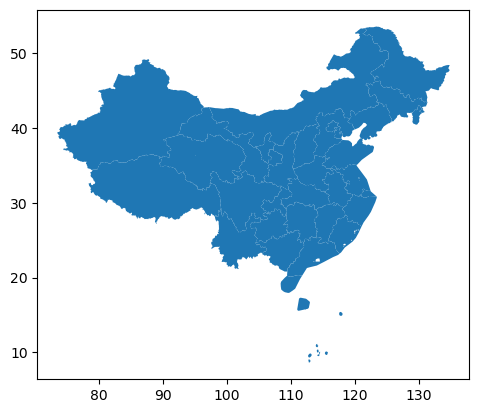

In [19]:
if ext_name == '.csv':
    df = pd.read_csv(saved_fname, encoding='ISO-8859-1')
    results = df
    # print(df)

if ext_name == 'gpkg':
    gdf = gpd.read_file(saved_fname)
    results = gdf
    gdf.plot()
    # print(gdf)

if ext_name == '.tif':
    results = Image.open(saved_fname)
    # Display the image
    # plt.imshow(results)
    # plt.colorbar()
    # plt.show()
    
results

In [20]:
STOP

NameError: name 'STOP' is not defined